In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
dataset = pd.read_csv('../workshop/heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
# Random sampling
train = dataset.sample(frac=0.8)
test = dataset.drop(train.index)

#Stratified sampling
train = dataset.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.8)
test = dataset.drop(train.index)
#train = trainvalidation.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.75)
#validation = dataset.drop(train.index)

print(train['DEATH_EVENT'].value_counts()/train.shape[0])
#print(validation['DEATH_EVENT'].value_counts()/validation.shape[0])
print(test['DEATH_EVENT'].value_counts()/test.shape[0])

DEATH_EVENT
0    0.677824
1    0.322176
Name: count, dtype: float64
DEATH_EVENT
0    0.683333
1    0.316667
Name: count, dtype: float64


In [30]:
train, test = train_test_split(dataset, test_size=0.2, stratify=dataset['DEATH_EVENT'])
print(train['DEATH_EVENT'].value_counts()/train.shape[0])
print(test['DEATH_EVENT'].value_counts()/test.shape[0])

DEATH_EVENT
0    0.677824
1    0.322176
Name: count, dtype: float64
DEATH_EVENT
0    0.683333
1    0.316667
Name: count, dtype: float64


In [31]:
train_features = train.drop('DEATH_EVENT', axis=1)
train_targets = train['DEATH_EVENT']
test_features = test.drop('DEATH_EVENT', axis=1)
test_targets = test['DEATH_EVENT']

In [32]:
classifier1 = DecisionTreeClassifier()
# classifier1.fit(train.drop('DEATH_EVENT', axis=1), train['DEATH_EVENT'])
classifier1.fit(train_features, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
classifier1.score(test_features, test_targets)


0.7833333333333333

In [35]:
def evaluate_model(classifier, features, targets):
    predictions = classifier.predict(features)
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    print(f'Accuracy {accuracy}')
    print(f'Precision {precision}')
    print(f'Recall {recall}')
    print(f'{confusion_matrix(targets, predictions)}')


In [38]:
train_predictions = classifier1.predict(train_features)
test_predictions = classifier1.predict(test_features)
print(f'Accuracy {accuracy_score(train_targets, train_predictions)} Precision {precision_score(train_targets, train_predictions)} Recall {recall_score(train_targets, train_predictions)}')
print(f'Accuracy {accuracy_score(test_targets, test_predictions)} Precision {precision_score(test_targets, test_predictions)} Recall {recall_score(test_targets, test_predictions)}')

Accuracy 1.0 Precision 1.0 Recall 1.0
Accuracy 0.7833333333333333 Precision 0.65 Recall 0.6842105263157895


In [ ]:
#evaluate_model(classifier1,train_features, train_predictions)
#evaluate_model(classifier1, test_features, test_predictions)

In [73]:
classifier2 = DecisionTreeClassifier(max_depth=1, min_samples_split=3, min_samples_leaf=2)
# classifier1.fit(train.drop('DEATH_EVENT', axis=1), train['DEATH_EVENT'])
classifier2.fit(train_features, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,3
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy 0.8368200836820083 Precision 0.8166666666666667 Recall 0.6363636363636364
Accuracy 0.8833333333333333 Precision 0.875 Recall 0.7368421052631579


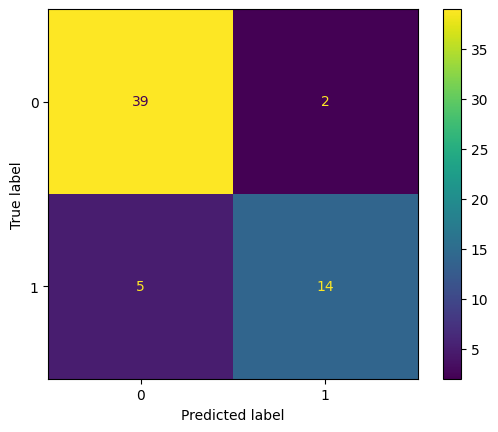

In [77]:
train_predictions2 = classifier2.predict(train_features)
test_predictions2 = classifier2.predict(test_features)
print(f'Accuracy {accuracy_score(train_targets, train_predictions2)} Precision {precision_score(train_targets, train_predictions2)} Recall {recall_score(train_targets, train_predictions2)}')
print(f'Accuracy {accuracy_score(test_targets, test_predictions2)} Precision {precision_score(test_targets, test_predictions2)} Recall {recall_score(test_targets, test_predictions2)}')
ConfusionMatrixDisplay.from_predictions(test_targets, test_predictions2)

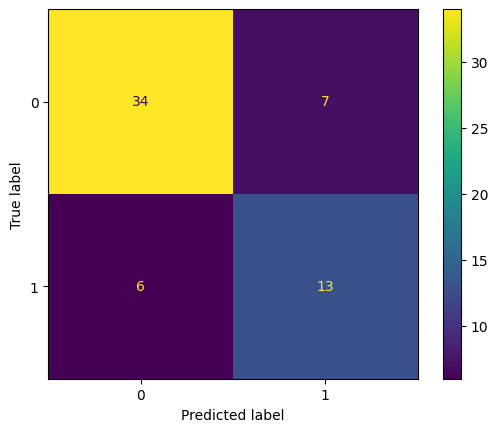

In [45]:
#confusion_matrix(test_targets, test_predictions)
ConfusionMatrixDisplay.from_predictions(test_targets, test_predictions)

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifier2)